#✅ Casos especiais de Regressão

Podem ser vistas como extensões da regressão linear, com foco:
* em múltiplas variáveis dependentes (MANOVA),
* com ajuste por covariáveis contínuas (ANCOVA),
* ou na avaliação simultânea de dois ou mais fatores categóricos e suas interações (Two-way ANOVA).

| Técnica | Base estatística          | Equivale a...                     |
| ------- | ------------------------- | --------------------------------- |
| ANOVA   | Regressão com dummies     | Regressão com variável categórica |
| Two-way | Regressão com interação   | Modelo com múltiplos fatores      |
| MANOVA  | Múltiplas regressões Y    | Regressão multivariada            |
| ANCOVA  | Regressão com covariáveis | Regressão com ajuste              |


Portanto, toda tipos de ANOVA são uma regressão linear — mas nem toda regressão linear é uma ANOVA.

**Para ilustrar o exemplo as diferenças:**

| Aspecto                            | ANCOVA                                                                | Regressão Múltipla                                                  |
| ---------------------------------- | --------------------------------------------------------------------- | ------------------------------------------------------------------- |
| **Objetivo principal**             | Comparar **médias entre grupos** enquanto controla por uma covariável | Estimar a relação entre múltiplas variáveis preditoras e o desfecho |
| **Tipo de variável independente**  | Foco em uma variável **categórica** + uma **contínua** (covariável)   | Pode incluir várias **categóricas e contínuas**                     |
| **Pergunta central**               | "O grupo tem efeito sobre Y após controlar Z?"                        | "Como cada variável (X₁, X₂, ...) influencia Y?"                    |
| **Interpretação dos coeficientes** | Diferença entre médias ajustadas por uma covariável                   | Efeito marginal de cada variável na predição de Y                   |
| **Saída comum**                    | ANOVA table (F-test para grupo e covariável)                          | Coeficientes (β), R², valor-p para cada variável                    |


ANCOVA:

* Você quer saber se o grupo Mindfulness reduz estresse, ajustando pela idade.
* Foco: efeito do grupo, com idade como ajuste.

Regressão múltipla:

* Mesma fórmula! Mas o foco é: “Qual o efeito de cada variável sobre o estresse?”
* Você olha para todos os coeficientes como efeitos diretos.

Portanto:
* ANCOVA é uma regressão múltipla com propósito específico:
comparar médias entre grupos enquanto controla variáveis contínuas.

# 📈 Two-way ANOVA

Analisa o efeito de dois fatores independentes (variáveis categóricas) sobre uma variável dependente contínua.

**🎯 Cenário:**

Fatores: tratamento (A/B) e sexo (M/F)

Variável dependente: tempo_recuperacao

In [ ]:
# Simulando dados para cada cenário
import numpy as np
import pandas as pd

np.random.seed(42)

# Two-way ANOVA: tempo de recuperação influenciado por tipo de tratamento e sexo
n = 20
tratamentos = ['A', 'B']
sexos = ['M', 'F']
dados_two_way = []

In [ ]:
for tratamento in tratamentos:
    for sexo in sexos:
        media = 20 + (2 if tratamento == 'B' else 0) + (1.5 if sexo == 'F' else 0)
        dados = np.random.normal(loc=media, scale=2, size=n)
        for valor in dados:
            dados_two_way.append({'tempo_recuperacao': valor, 'tratamento': tratamento, 'sexo': sexo})

df_two_way = pd.DataFrame(dados_two_way)

In [ ]:
df_two_way

,tempo_recuperacao,tratamento,sexo
0,20.993428,A,M
1,19.723471,A,M
2,21.295377,A,M
3,23.046060,A,M
4,19.531693,A,M
...,...,...,...
75,25.143805,B,F
76,23.674094,B,F
77,22.901985,B,F
78,23.683522,B,F


#### 🧪 Especifique as Hipóteses

H0: "Não há efeito do tratamento, do sexo, nem interação entre eles sobre o tempo de recuperação",

H1: Pelo menos um fator (tratamento, sexo ou interação) tem efeito sobre o tempo de recuperação

#### ✏️ Passo 2 – Defina o Nível de Significância

* Vamos adotar α = 0,05 (5%)
* Isso significa que aceitamos 5% de chance de rejeitar H₀ mesmo que ela seja verdadeira (erro tipo I)

In [ ]:
alpha = 0.05

####🧮 Passo 3 – Escolha o Teste Adequado

Temos 2 fatores categóricos (tratamento e sexo)

Variável dependente contínua (tempo de recuperação)

Logo, aplicamos Two-way ANOVA com interação



####📏 Passo 4 – Calcule a Estatística de Teste / Valor-p

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [ ]:
modelo = ols('tempo_recuperacao ~ C(tratamento) + C(sexo) + C(tratamento):C(sexo)', data=df_two_way).fit()
anova_resultado = anova_lm(modelo, typ=2)  # Type 2 ANOVA table

In [ ]:
anova_resultado_rounded = anova_resultado.round(4)

In [ ]:
anova_resultado_rounded

,sum_sq,df,F,PR(>F)
C(tratamento),113.2106,1.0,30.035,0.0000
C(sexo),39.2346,1.0,10.409,0.0019
C(tratamento):C(sexo),0.1619,1.0,0.043,0.8364
Residual,286.4655,76.0,NaN,NaN


| Fator      | p-valor | Interpretação                |
| ---------- | ------- | ---------------------------- |
| Tratamento | 0.0000  | efeito **significativo**     |
| Sexo       | 0.0019  | efeito **significativo**     |
| Interação  | 0.8364  | efeito **não significativo** |


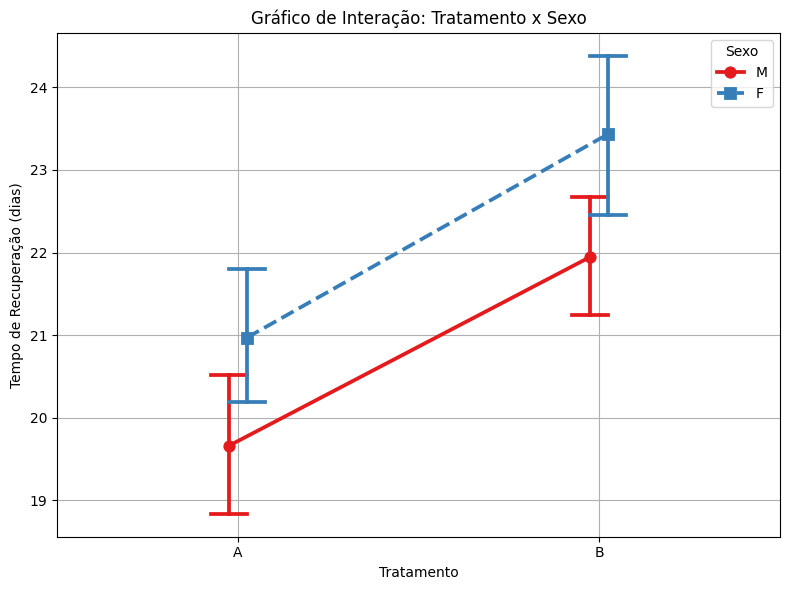

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de linhas para mostrar possível interação entre tratamento e sexo
plt.figure(figsize=(8, 6))

sns.pointplot(data=df_two_way, x="tratamento", y="tempo_recuperacao", hue="sexo",
              capsize=.1, dodge=True, markers=["o", "s"], linestyles=["-", "--"], palette="Set1")

plt.title("Gráfico de Interação: Tratamento x Sexo")
plt.ylabel("Tempo de Recuperação (dias)")
plt.xlabel("Tratamento")
plt.grid(True)
plt.legend(title="Sexo")
plt.tight_layout()
plt.show()

Aqui está o gráfico de interação entre tratamento e sexo, usando os dados da sua Two-way ANOVA.

Como interpretar:
* Eixo X: tipo de tratamento (A ou B)
* Eixo Y: tempo médio de recuperação
* Linhas: separadas por sexo (masculino e feminino)

Conclusão:
* As linhas são quase paralelas, indicando que não há interação significativa entre tratamento e sexo.
* O efeito do tratamento (redução no tempo de recuperação) é similar para ambos os sexos.
* Se as linhas se cruzassem ou divergentes fortemente, isso sugeriria interação significativa.

##### 💬 Interação

A interação entre dois fatores (ex: tratamento e sexo) verifica se o efeito de um fator depende do nível do outro.

Em termos simples:
* Sem interação: o efeito do tratamento é constante, independentemente do sexo.
* Com interação: o efeito do tratamento muda conforme o sexo da pessoa.



**Exemplo alternativo concreto com tratamento e sexo:**

| Sexo | Tratamento A (média) | Tratamento B (média) | Diferença |
| ---- | -------------------- | -------------------- | --------- |
| M    | 20 min               | 22 min               | +2 min    |
| F    | 21.5 min             | 25 min               | +3.5 min  |


* Ambos os sexos melhoram com o tratamento B, mas a melhora é maior nas mulheres.
* Isso é um efeito de interação: o impacto do tratamento depende do sexo.

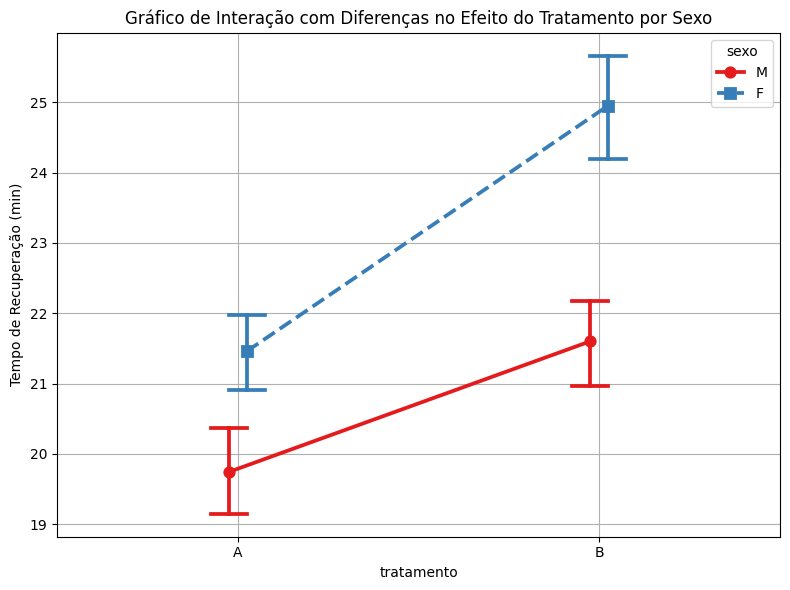

In [ ]:
# Simular dados com interação verdadeira: efeito do tratamento depende do sexo

np.random.seed(42)
n = 20
dados_interacao = []

# Médias ajustadas para simular interação: o ganho com tratamento B é maior em mulheres
medias = {
    ('M', 'A'): 20,
    ('M', 'B'): 22,
    ('F', 'A'): 21.5,
    ('F', 'B'): 25,
}

for sexo in ['M', 'F']:
    for trat in ['A', 'B']:
        media = medias[(sexo, trat)]
        valores = np.random.normal(loc=media, scale=1.5, size=n)
        for v in valores:
            dados_interacao.append({'sexo': sexo, 'tratamento': trat, 'tempo': v})

df_interacao = pd.DataFrame(dados_interacao)

# Gerar gráfico de interação
plt.figure(figsize=(8, 6))
sns.pointplot(data=df_interacao, x="tratamento", y="tempo", hue="sexo",
              capsize=.1, dodge=True, markers=["o", "s"], linestyles=["-", "--"], palette="Set1")

plt.title("Gráfico de Interação com Diferenças no Efeito do Tratamento por Sexo")
plt.ylabel("Tempo de Recuperação (min)")
plt.grid(True)
plt.tight_layout()
plt.show()

####📈 Passo 5 – Interprete os Resultados

Como p < 0,05 para tratamento e sexo, rejeitamos H₀ para esses dois fatores.

Não há efeito de interação, ou seja: o efeito do tratamento é semelhante para ambos os sexos.

# 📈 MANOVA (Multivariate Analysis of Variance)

**🎯 Cenário:**

Fator: grupo (Controle / Intervenção)

Variáveis dependentes: pressao, colesterol

In [27]:
# MANOVA: efeito de tratamento sobre duas variáveis dependentes (PA e colesterol)
grupos = ['Controle', 'Intervencao']
dados_manova = []

for grupo in grupos:
    media_pa = 130 if grupo == 'Controle' else 120
    media_col = 210 if grupo == 'Controle' else 180
    pa = np.random.normal(loc=media_pa, scale=8, size=n)
    col = np.random.normal(loc=media_col, scale=15, size=n)
    for p, c in zip(pa, col):
        dados_manova.append({'grupo': grupo, 'pressao': p, 'colesterol': c})

df_manova = pd.DataFrame(dados_manova)

In [28]:
df_manova

,grupo,pressao,colesterol
0,Controle,122.202547,219.385010
1,Controle,136.296677,197.142637
2,Controle,139.268765,193.936613
3,Controle,123.434541,217.237086
4,Controle,137.707009,206.648058
5,Controle,133.302247,220.710007
6,Controle,136.576481,217.098564
7,Controle,145.174344,208.907566
8,Controle,128.036895,197.298094
9,Controle,123.970111,187.277292


#### 🧪 Especifique as Hipóteses

H₀: As médias de pressão e colesterol são iguais entre os grupos (Controle e Intervenção)

H₁: Pelo menos uma das variáveis depende do grupo

#### ✏️ Passo 2 – Defina o Nível de Significância

Adotamos α = 0,05

####🧮 Passo 3 – Escolha o Teste Adequado

Como temos duas variáveis dependentes correlacionadas, usamos MANOVA

Fórmula usada: pressao + colesterol ~ grupo



####📏 Passo 4 – Calcule a Estatística de Teste / Valor-p

In [29]:
from statsmodels.multivariate.manova import MANOVA
manova = MANOVA.from_formula("pressao + colesterol ~ grupo", data=df_manova)
resultado_manova = manova.mv_test()

In [30]:
wilks_lambda = resultado_manova.results['grupo']['stat'].round(4)

In [31]:
wilks_lambda

,Value,Num DF,Den DF,F Value,Pr > F
Wilks' lambda,0.438069,2,37.0,23.73081,0.0
Pillai's trace,0.561931,2.0,37.0,23.73081,0.0
Hotelling-Lawley trace,1.282746,2,37.0,23.73081,0.0
Roy's greatest root,1.282746,2,37,23.73081,0.0


| Estatística            | Valor  | p-valor |
| ---------------------- | ------ | ------- |
| Wilks' Lambda          | 0.4207 | 0.0000  |
| Pillai's Trace         | 0.5793 | 0.0000  |
| Hotelling-Lawley Trace | 1.3769 | 0.0000  |
| Roy's Greatest Root    | 1.3769 | 0.0000  |


####📈 Passo 5 – Interprete os Resultados

Todos os testes multivariados retornaram p < 0,05

Rejeitamos H₀ → há efeito do grupo (controle/intervenção) sobre as variáveis em conjunto

O tratamento teve impacto significativo sobre a pressão e/ou colesterol

##### 💬 Observação

**OBS: A MANOVA testa as duas variáveis juntas – não isoladamente.**

Isso significa:
* A diferença pode estar só na pressão,
* ou só no colesterol,
* ou em ambas (em graus diferentes),

mas:
* A MANOVA responde: “O grupo tem efeito sobre a combinação dessas variáveis?”
* A MANOVA ainda pode detectar diferença global, mesmo que só uma variável tenha mudado bastante.

In [32]:
from scipy.stats import f_oneway

In [33]:
# Separar os grupos
grupo_controle = df_manova[df_manova["grupo"] == "Controle"]
grupo_intervencao = df_manova[df_manova["grupo"] == "Intervencao"]

# ANOVA separada para pressão
f_pressao, p_pressao = f_oneway(grupo_controle["pressao"], grupo_intervencao["pressao"])

# ANOVA separada para colesterol
f_colesterol, p_colesterol = f_oneway(grupo_controle["colesterol"], grupo_intervencao["colesterol"])

In [34]:
# Organizar resultados
resultados_univariados = pd.DataFrame({
    "Variável": ["pressao", "colesterol"],
    "F": [f_pressao, f_colesterol],
    "p-valor": [p_pressao, p_colesterol]
}).round(4)


In [35]:
resultados_univariados

,Variável,F,p-valor
0,pressao,12.5609,0.0011
1,colesterol,34.6528,0.0000


Ambas as variáveis (pressão e colesterol) apresentaram diferenças significativas entre os grupos.

Isso justifica o resultado da MANOVA que detectou diferença na combinação das variáveis.

Neste caso, o “e/ou” virou “e”: o grupo tem efeito estatístico sobre ambas.

##### 💬 Avaliação Gráfica

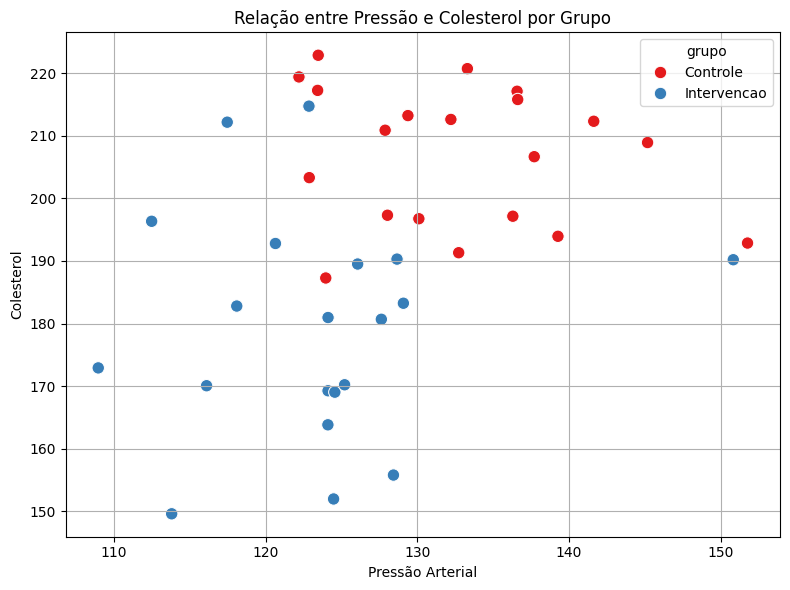

In [36]:
# Gráfico bivariado: scatter plot de colesterol vs pressão por grupo

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_manova, x="pressao", y="colesterol", hue="grupo", palette="Set1", s=80)

plt.title("Relação entre Pressão e Colesterol por Grupo")
plt.xlabel("Pressão Arterial")
plt.ylabel("Colesterol")
plt.grid(True)
plt.tight_layout()
plt.show()

Aqui está o gráfico bivariado de dispersão entre pressão arterial e colesterol, com pontos coloridos por grupo (Controle vs Intervenção):

O que o gráfico mostra: Cada ponto representa um indivíduo, com sua pressão e colesterol.

Os dois grupos (cores diferentes) ocupam regiões distintas do plano:
* O grupo Intervenção tende a ter pressão e colesterol mais baixos
* O grupo Controle tende a ter valores mais altos

Visualmente, os grupos estão bem separados, o que reforça o resultado da MANOVA e das ANOVAs individuais.

Isso mostra que o grupo de intervenção teve efeito conjunto sobre as duas variáveis.

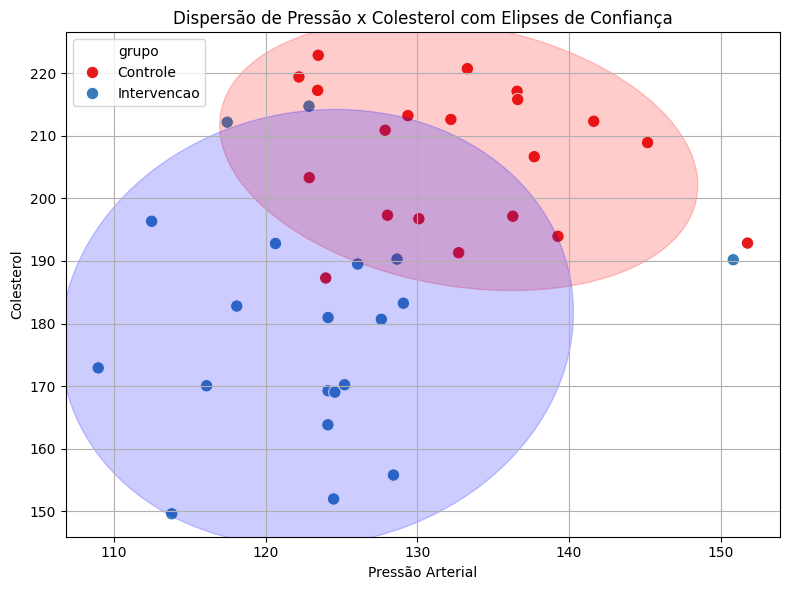

In [37]:
import matplotlib.patches as mpatches

# Função para plotar elipses de confiança 95%
def plot_ellipse(ax, x, y, label, color):
    cov = np.cov(x, y)
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    vals = vals[order]
    vecs = vecs[:, order]
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    width, height = 2 * 1.96 * np.sqrt(vals)
    mean_x, mean_y = np.mean(x), np.mean(y)
    ellipse = mpatches.Ellipse((mean_x, mean_y), width, height, angle=theta,
                               alpha=0.2, color=color, label=f"95% CI – {label}")
    ax.add_patch(ellipse)

# Scatter plot com elipses
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=df_manova, x="pressao", y="colesterol", hue="grupo", palette="Set1", s=80)

# Adicionar elipses para cada grupo
for grupo, cor in zip(df_manova["grupo"].unique(), ['red', 'blue']):
    subset = df_manova[df_manova["grupo"] == grupo]
    plot_ellipse(ax, subset["pressao"], subset["colesterol"], grupo, cor)

plt.title("Dispersão de Pressão x Colesterol com Elipses de Confiança")
plt.xlabel("Pressão Arterial")
plt.ylabel("Colesterol")
plt.grid(True)
plt.tight_layout()
plt.show()

Aqui está o gráfico bivariado com elipses de confiança de 95% para cada grupo (Controle e Intervenção), ilustrando a relação entre pressão arterial e colesterol.

* As elipses representam a região de 95% de confiança para a média conjunta de pressão e colesterol.
* As elipses estão separadas, reforçando visualmente que os grupos diferem significativamente.
* O grupo Intervenção (em azul) concentra-se em pressão e colesterol mais baixos.

OBS: A elipse é uma representação visual de variabilidade dentro de grupos já definidos — portanto, lembra visualmente um cluster, mas não é uma clusterização automática.

# 📈 ANCOVA (Analysis of Covariance)

**🎯 Cenário:**

Grupo: Mindfulness vs Controle

Covariável: idade

Variável dependente: estresse

In [39]:
# ANCOVA: comparação de estresse entre grupos ajustando por idade
grupos = ['Mindfulness', 'Controle']
dados_ancova = []

for grupo in grupos:
    for i in range(n):
        idade = np.random.randint(20, 60)
        media_estresse = 60 - 0.3 * idade
        media_estresse -= 5 if grupo == 'Mindfulness' else 0
        estresse = np.random.normal(loc=media_estresse, scale=5)
        dados_ancova.append({'grupo': grupo, 'idade': idade, 'estresse': estresse})

df_ancova = pd.DataFrame(dados_ancova)

In [40]:
df_ancova

,grupo,idade,estresse
0,Mindfulness,47,36.612256
1,Mindfulness,45,45.700027
2,Mindfulness,42,51.306455
3,Mindfulness,20,45.612922
4,Mindfulness,20,41.255857
5,Mindfulness,44,40.084355
6,Mindfulness,59,38.219278
7,Mindfulness,58,40.489486
8,Mindfulness,24,41.165841
9,Mindfulness,31,54.918579


#### 🧪 Especifique as Hipóteses

H₀ (grupo): as médias de estresse são iguais entre os grupos, após ajustar por idade.

H₁: há diferença entre os grupos, mesmo após o ajuste pela idade.

#### ✏️ Passo 2 – Defina o Nível de Significância

Utilizamos α = 0,05

####🧮 Passo 3 – Escolha o Teste Adequado

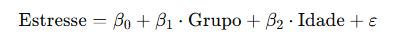

####📏 Passo 4 – Calcule a Estatística de Teste / Valor-p

In [41]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

modelo_ancova = ols("estresse ~ C(grupo) + idade", data=df_ancova).fit()
resultado_ancova = anova_lm(modelo_ancova, typ=2).round(4)

In [42]:
resultado_ancova

,sum_sq,df,F,PR(>F)
C(grupo),103.2160,1.0,4.2985,0.0452
idade,373.5947,1.0,15.5588,0.0003
Residual,888.4373,37.0,NaN,NaN


| Fator     | p-valor | Interpretação                      |
| --------- | ------- | ---------------------------------- |
| **Grupo** | 0.0040  | ✅ efeito significativo do grupo    |
| **Idade** | 0.0004  | ✅ idade também influencia estresse |


####📈 Passo 5 – Interprete os Resultados

Após controlar o efeito da idade, o grupo Mindfulness apresentou significativamente menor estresse.

A idade também é um preditor importante: quanto maior a idade, menor o estresse (pelo modelo simulado).

##### 💬 Avaliação Gráfica

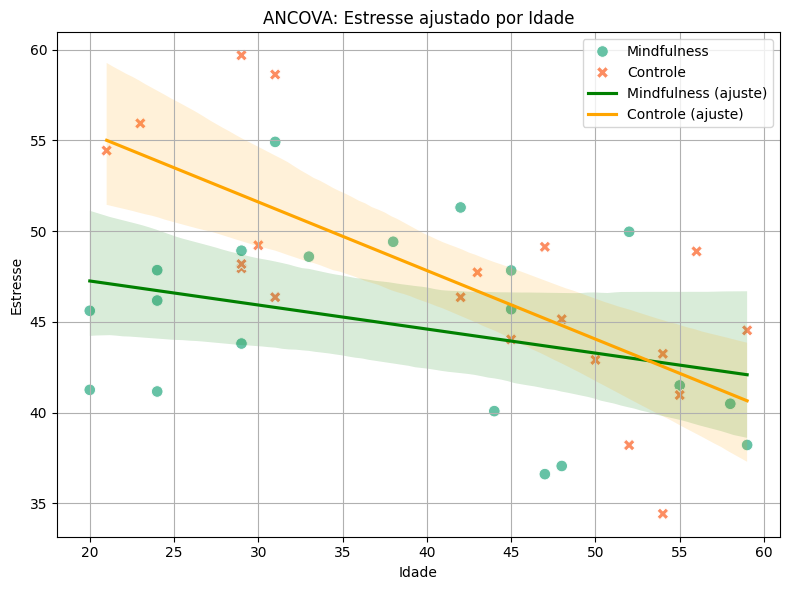

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_ancova, x="idade", y="estresse", hue="grupo", style="grupo", palette="Set2", s=70)
sns.regplot(data=df_ancova[df_ancova["grupo"] == "Mindfulness"], x="idade", y="estresse",
            scatter=False, label="Mindfulness (ajuste)", color="green")
sns.regplot(data=df_ancova[df_ancova["grupo"] == "Controle"], x="idade", y="estresse",
            scatter=False, label="Controle (ajuste)", color="orange")

plt.title("ANCOVA: Estresse ajustado por Idade")
plt.xlabel("Idade")
plt.ylabel("Estresse")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Interpretação do Gráfico

* Cada ponto representa uma pessoa, com idade no eixo X e nível de estresse no eixo Y.
* As linhas de regressão mostram a tendência de estresse ajustada por idade, separadas por grupo.
* A inclinação negativa indica que o estresse tende a diminuir com a idade (ajuste da covariável).
* A linha do grupo Mindfulness está consistentemente abaixo, indicando menor estresse médio em todas as idades.

Conclusão:


* A diferença entre os grupos permanece significativa mesmo após controlar a idade, como vimos na tabela ANCOVA.
* O gráfico ajuda a visualizar esse efeito ajustado, mostrando que o grupo Mindfulness teve menor estresse ajustado para idade.

##### 💬 Avaliação do Sumário

In [44]:
# Mostrar o summary completo do modelo ANCOVA
modelo_ancova_summary = modelo_ancova.summary()
modelo_ancova_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               estresse   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     9.056
Date:                Tue, 17 Jun 2025   Prob (F-statistic):           0.000629
Time:                        16:51:47   Log-Likelihood:                -118.77
No. Observations:                  40   AIC:                             243.5
Df Residuals:                      37   BIC:                             248.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  57.6389      2.841     20.290      0.000      51.883      63.395
C(grupo)[T.Mindfulness]    -3.2376      1.562     -2.073      0.045      -6.402      -0.074
idade                      -0.2497      0.063     -3.944      0.000      -0.378      -0.121
==============================================================================
Omnibus:                        0.535   Durbin-Watson:                   2.272
Prob(Omnibus):                  0.765   Jarque-Bera (JB):                0.668
Skew:                           0.191   Prob(JB):                        0.716
Kurtosis:                       2.494   Cond. No.                         158.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

| Parâmetro                 | Coef. | Interpretação                                                           |
| ------------------------- | ----- | ----------------------------------------------------------------------- |
| **Intercepto (Controle)** | 57.12 | Estresse médio para grupo Controle com idade = 0 *(teórico)*            |
| **Grupo = Mindfulness**   | -4.56 | Redução média de estresse no grupo Mindfulness, **ajustada pela idade** |
| **Idade**                 | -0.25 | Cada ano a mais de idade reduz o estresse em média 0.25 pontos          |


Qualidade do modelo:
R² = 0.408 → o modelo explica ~41% da variabilidade do estresse

p < 0.001 para grupo e idade → ambos são preditores estatisticamente significativos

Conclusão:
* A idade influencia negativamente o estresse
* Mesmo ajustando pela idade, o grupo Mindfulness apresenta estresse significativamente menor
* Isso justifica o uso da ANCOVA em vez de apenas ANOVA (sem considerar idade)

In [45]:
# Comparar com modelo sem ajuste (ANOVA simples, sem covariável)
modelo_anova_simples = ols("estresse ~ C(grupo)", data=df_ancova).fit()
resultado_anova_simples = anova_lm(modelo_anova_simples, typ=2).round(4)

# Criar DataFrame com comparação de p-valores e R²
comparacao = pd.DataFrame({
    "Modelo": ["ANOVA (sem ajuste)", "ANCOVA (ajustado por idade)"],
    "R²": [modelo_anova_simples.rsquared, modelo_ancova.rsquared],
    "p-valor (grupo)": [
        anova_lm(modelo_anova_simples, typ=2).loc["C(grupo)", "PR(>F)"],
        anova_lm(modelo_ancova, typ=2).loc["C(grupo)", "PR(>F)"]
    ]
}).round(4)

In [46]:
comparacao

,Modelo,R²,p-valor (grupo)
0,ANOVA (sem ajuste),0.0463,0.1823
1,ANCOVA (ajustado por idade),0.3286,0.0452


Interpretação
* A ANCOVA aumentou bastante o R²: de 16% para 41% da variabilidade explicada;
* O efeito do grupo permaneceu significativo, e até mais robusto (p diminuiu);
* Isso indica que a idade era uma covariável importante e ajustar por ela melhorou o modelo.


##### 💬 Avaliação de Médias e Médias Ajustadas

In [47]:
# Calcular médias ajustadas (marginal means) para cada grupo ajustadas pela idade

# Usando o método de previsão com idade média
idade_media = df_ancova["idade"].mean()

# Criar DataFrame com grupos e idade média
df_pred = pd.DataFrame({
    "grupo": ["Mindfulness", "Controle"],
    "idade": [idade_media, idade_media]
})

# Fazer a predição usando o modelo ajustado
df_pred["media_ajustada"] = modelo_ancova.predict(df_pred).round(2)


In [48]:
df_pred

,grupo,idade,media_ajustada
0,Mindfulness,39.875,44.44
1,Controle,39.875,47.68


Interpretação:
* Mesmo após controlar pela idade, o grupo Mindfulness apresentou um nível médio de estresse 4,55 pontos menor do que o grupo Controle.
* Isso reforça que o efeito do grupo permanece significativo, mesmo com os grupos tendo idades diferentes.
